Image Classification

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/machine_learning/Machine_learning/Saintgits_by shailesh sir/Day 3/ImageClassification

/content/drive/MyDrive/machine_learning/Machine_learning/Saintgits_by shailesh sir/Day 3/ImageClassification


In [3]:
ls

checkpoint            lemon1.jpg  lemon4.jpg
curdata.csv           lemon2.jpg  my_checkpoint.data-00000-of-00001
img_classifier.ipynb  lemon3.jpg  my_checkpoint.index


In [4]:
import os
import numpy as np
import pandas as pd
import cv2

In [5]:
def get_features(img):
    return list(cv2.mean(img)[:-1])

In [7]:
data=[]
basepath='/content/drive/MyDrive/machine_learning/Machine_learning/Saintgits_by shailesh sir/Day 4/dataset'
for folder in os.scandir(basepath):
    if folder.is_dir():
        #print(folder.name)
        for file in os.scandir(folder.path):
            im = cv2.imread(file.path,cv2.IMREAD_COLOR)
            im = cv2.cvtColor(im,cv2.COLOR_BGRA2RGB)
            #print(im)
            features=get_features(im)
            #print(features)
            features.append(folder.name)
            data.append(features)
            #print(features)
print(data)

[[148.11437037037038, 129.7312, 84.09592098765432, 'melon'], [216.19443616492796, 224.07205166418282, 198.71262791852956, 'melon'], [201.32772732648246, 178.4047279675839, 150.46524047528646, 'melon'], [166.03120987654322, 170.96171851851852, 143.6199901234568, 'melon'], [167.80424691358024, 185.98696296296296, 154.67926913580246, 'melon'], [168.28789925313842, 166.92148021611314, 147.61864373112982, 'melon'], [199.0914880952381, 173.71873015873015, 156.2122222222222, 'melon'], [148.11437037037038, 129.7312, 84.09592098765432, 'melon'], [217.58591259232858, 207.05540703776313, 196.4403057486287, 'melon'], [191.58952649111674, 189.28896335659897, 163.06587087563452, 'melon'], [245.9088032903583, 231.5743296685913, 192.3597247488729, 'lemon'], [232.69082632360218, 232.24819396338447, 170.52845126175163, 'lemon'], [230.44007312033062, 228.03771260530917, 165.2597162613257, 'lemon'], [240.57896296296298, 220.28397037037038, 163.49147654320987, 'lemon'], [248.17161814220637, 227.86783521489

In [8]:
df = pd.DataFrame(data, columns=['R','G','B','class'])
print(df)
df.to_csv('curdata.csv',index=False)

             R           G           B  class
0   148.114370  129.731200   84.095921  melon
1   216.194436  224.072052  198.712628  melon
2   201.327727  178.404728  150.465240  melon
3   166.031210  170.961719  143.619990  melon
4   167.804247  185.986963  154.679269  melon
5   168.287899  166.921480  147.618644  melon
6   199.091488  173.718730  156.212222  melon
7   148.114370  129.731200   84.095921  melon
8   217.585913  207.055407  196.440306  melon
9   191.589526  189.288963  163.065871  melon
10  245.908803  231.574330  192.359725  lemon
11  232.690826  232.248194  170.528451  lemon
12  230.440073  228.037713  165.259716  lemon
13  240.578963  220.283970  163.491477  lemon
14  248.171618  227.867835  156.137037  lemon
15  238.902269  231.648959  171.979533  lemon
16  110.106587  135.742494   44.469429  lemon
17  247.788956  240.565422  201.029378  lemon
18  233.148176  226.423316  175.492492  lemon
19  242.314348  217.121612  148.907721  lemon
20  238.354212  229.358064  183.05

In [9]:
df = pd.read_csv('curdata.csv')

print(df)

lX = df[df['class']=='lemon']
mX = df[df['class']=='melon']

             R           G           B  class
0   148.114370  129.731200   84.095921  melon
1   216.194436  224.072052  198.712628  melon
2   201.327727  178.404728  150.465240  melon
3   166.031210  170.961719  143.619990  melon
4   167.804247  185.986963  154.679269  melon
5   168.287899  166.921480  147.618644  melon
6   199.091488  173.718730  156.212222  melon
7   148.114370  129.731200   84.095921  melon
8   217.585913  207.055407  196.440306  melon
9   191.589526  189.288963  163.065871  melon
10  245.908803  231.574330  192.359725  lemon
11  232.690826  232.248194  170.528451  lemon
12  230.440073  228.037713  165.259716  lemon
13  240.578963  220.283970  163.491477  lemon
14  248.171618  227.867835  156.137037  lemon
15  238.902269  231.648959  171.979533  lemon
16  110.106587  135.742494   44.469429  lemon
17  247.788956  240.565422  201.029378  lemon
18  233.148176  226.423316  175.492492  lemon
19  242.314348  217.121612  148.907721  lemon
20  238.354212  229.358064  183.05

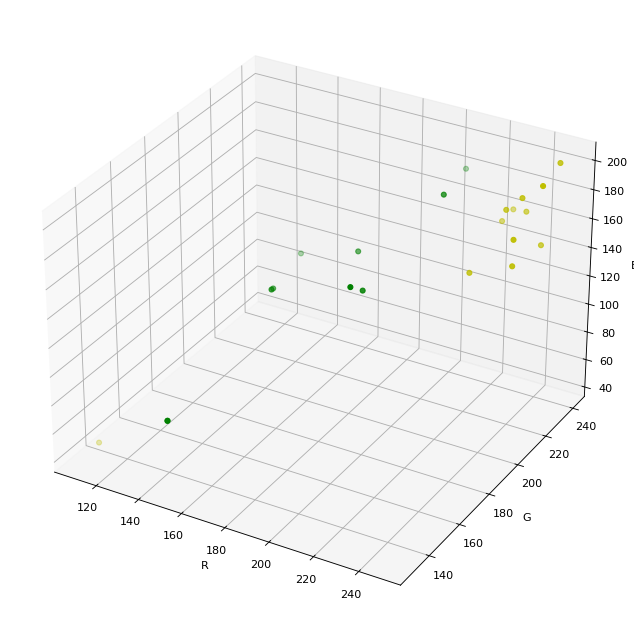

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

%matplotlib inline

plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.axes(projection='3d')

ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B');

ax.scatter3D(lX['R'], lX['G'], lX['B'],color='y')
ax.scatter3D(mX['R'], mX['G'], mX['B'],color='g')

In [11]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [12]:
print(X)

[[148.11437037 129.7312      84.09592099]
 [216.19443616 224.07205166 198.71262792]
 [201.32772733 178.40472797 150.46524048]
 [166.03120988 170.96171852 143.61999012]
 [167.80424691 185.98696296 154.67926914]
 [168.28789925 166.92148022 147.61864373]
 [199.0914881  173.71873016 156.21222222]
 [148.11437037 129.7312      84.09592099]
 [217.58591259 207.05540704 196.44030575]
 [191.58952649 189.28896336 163.06587088]
 [245.90880329 231.57432967 192.35972475]
 [232.69082632 232.24819396 170.52845126]
 [230.44007312 228.03771261 165.25971626]
 [240.57896296 220.28397037 163.49147654]
 [248.17161814 227.86783521 156.13703704]
 [238.90226907 231.64895877 171.97953269]
 [110.10658718 135.74249379  44.46942871]
 [247.78895556 240.56542222 201.02937778]
 [233.148176   226.423316   175.492492  ]
 [242.31434826 217.12161194 148.90772139]
 [238.35421235 229.3580642  183.05447901]
 [227.15680079 211.09937407 143.47723795]]


In [13]:
print(y)

['melon' 'melon' 'melon' 'melon' 'melon' 'melon' 'melon' 'melon' 'melon'
 'melon' 'lemon' 'lemon' 'lemon' 'lemon' 'lemon' 'lemon' 'lemon' 'lemon'
 'lemon' 'lemon' 'lemon' 'lemon']


In [14]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
y=le.fit(y).transform(y)

print(y)


[1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
#from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

#classifier = MLPClassifier(random_state=1,hidden_layer_sizes=(100, 50),max_iter=1000)
classifier = SVC()

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(y_pred)
print(y_test)


[1 0 0 0 0 1 0]
[1 0 1 1 0 1 0]


Classifier saved to image_classifier.pkl


In [19]:
!pip freeze | grep -e "pandas" -e "numpy" -e "opencv-python" -e "scikit-learn" -e "matplotlib" > requirements.txt
print("requirements.txt created.")

requirements.txt created.


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[6 0]
 [1 6]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.86      0.92         7

    accuracy                           0.92        13
   macro avg       0.93      0.93      0.92        13
weighted avg       0.93      0.92      0.92        13



https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

https://anaconda.org/DistrictDataLabs/yellowbrick

Enter image path : /content/drive/MyDrive/ImageClassification/lemon1.jpg
It is a melon


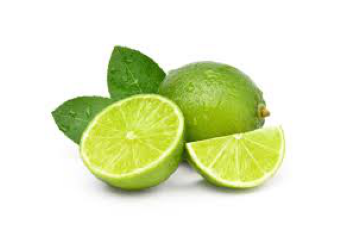

In [ ]:
#from PIL import Image
import matplotlib.pyplot as plt

image=input("Enter image path : ")
im=np.array(Image.open(image))
features=get_features(im)
yp=classifier.predict([features])
yp=le.inverse_transform(yp)
print('It is a '+yp[0])
plt.axis("off")
plt.imshow(im)
plt.show()